# Ensemble Methods: Strengths and Weaknesses

## 1. Learning Goals

By the end of this notebook, you will be able to:

- **Understand how ensemble methods (Random Forest and AdaBoost) work**  
  Learn how combining multiple weak learners—such as decision trees—can lead to stronger, more accurate models by reducing variance or bias.

- **Identify their strengths and weaknesses through experimentation**  
  Observe how each method behaves under different data conditions, such as clean vs. noisy datasets, and understand the trade-offs involved.

- **Visually interpret decision boundaries and classification behavior**  
  Use intuitive visualizations where background color shows the model's predicted class regions, and point color shows the actual class.  
  This helps reveal not just how accurate a model is, but how it separates the feature space.

- **Compare their performance on clean vs. noisy datasets**  
  Analyze how Random Forest and AdaBoost differ in terms of robustness, overfitting tendencies, and adaptability in varying data quality scenarios.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
def plot_decision_boundary(model, X, y, ax, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=ListedColormap(['#FFBBBB', '#BBBBFF']), alpha=0.4)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

## 2. Random Forest and AdaBoost on Clean Data

In this section, we use a clean and well-separated dataset to observe how Random Forest and AdaBoost behave under ideal conditions.

Random Forest builds an ensemble of deep decision trees trained on random subsets of the data and features. It then averages the predictions of these trees to produce a robust result. This method helps reduce overfitting while maintaining high accuracy.

AdaBoost, on the other hand, builds its ensemble sequentially. Each new tree focuses more on the examples that previous trees misclassified. On clean data, AdaBoost can achieve strong performance with fewer trees because the decision boundary is easier to learn.

In the plots below, the **background color** represents the model's decision regions, while the **dot colors** represent the true class labels. Notice how both models produce clear, accurate decision boundaries that closely align with the true class distribution.

Even though both models perform well, the Random Forest shows a slightly blockier boundary due to its tree-based averaging, while AdaBoost tends to create smoother splits with fewer estimators.

Random Forest Accuracy (clean data): 1.0
AdaBoost Accuracy (clean data): 0.9733333333333334


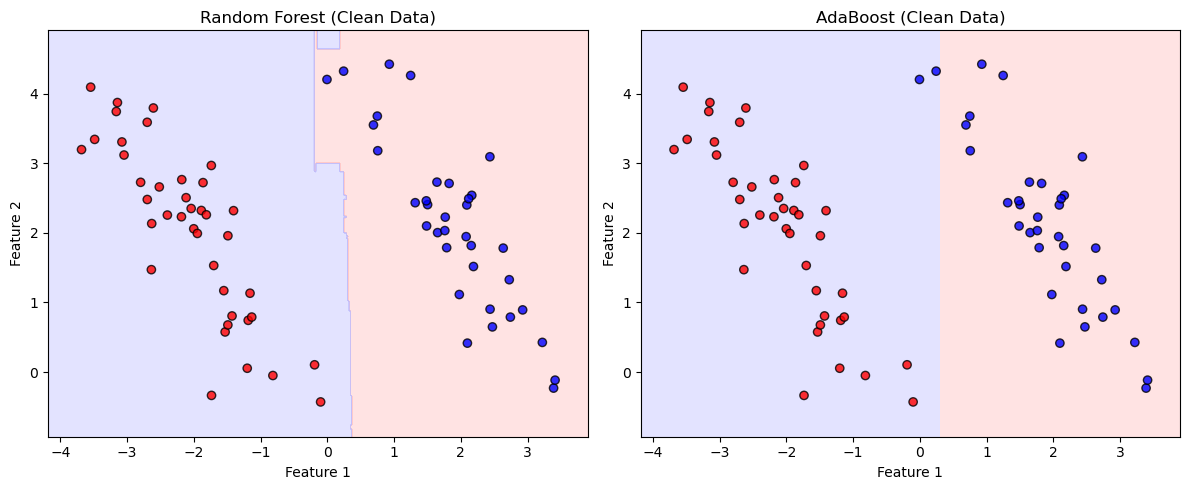

In [3]:
Xc, yc = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, class_sep=2.0, flip_y=0.0, random_state=3)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.25, random_state=42)

rf_clean = RandomForestClassifier(n_estimators=100, random_state=0).fit(Xc_train, yc_train)
ab_clean = AdaBoostClassifier(n_estimators=50, random_state=0).fit(Xc_train, yc_train)

print("Random Forest Accuracy (clean data):", accuracy_score(yc_test, rf_clean.predict(Xc_test)))
print("AdaBoost Accuracy (clean data):", accuracy_score(yc_test, ab_clean.predict(Xc_test)))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(rf_clean, Xc_test, yc_test, axs[0], "Random Forest (Clean Data)")
plot_decision_boundary(ab_clean, Xc_test, yc_test, axs[1], "AdaBoost (Clean Data)")
plt.tight_layout()
plt.show()


## 3. Random Forest and AdaBoost on Noisy Data

Here, we test both models on a more difficult dataset that includes noise and overlapping class distributions. This simulates real-world challenges like label errors and unclear class boundaries.

Random Forest maintains strong performance in the presence of noise. By averaging over many trees trained on bootstrapped samples, it naturally dampens the effect of mislabeled or ambiguous points. This helps produce a more stable and generalized boundary, even when the data is less than perfect.

AdaBoost, however, tends to **overemphasize noisy or hard-to-classify points**. Because each new model in AdaBoost’s sequence tries to correct the mistakes of the previous ones, it may end up focusing too heavily on outliers—resulting in overfitting. This is especially visible in noisy settings, where the decision boundary can become unnecessarily complex.

In the visualizations, you’ll notice that AdaBoost’s boundary might wrap tightly around some points, trying to "fix" their classification. In contrast, Random Forest tends to preserve a simpler and more general decision surface.

Random Forest Accuracy (noisy data): 0.8533333333333334
AdaBoost Accuracy (noisy data): 0.8533333333333334


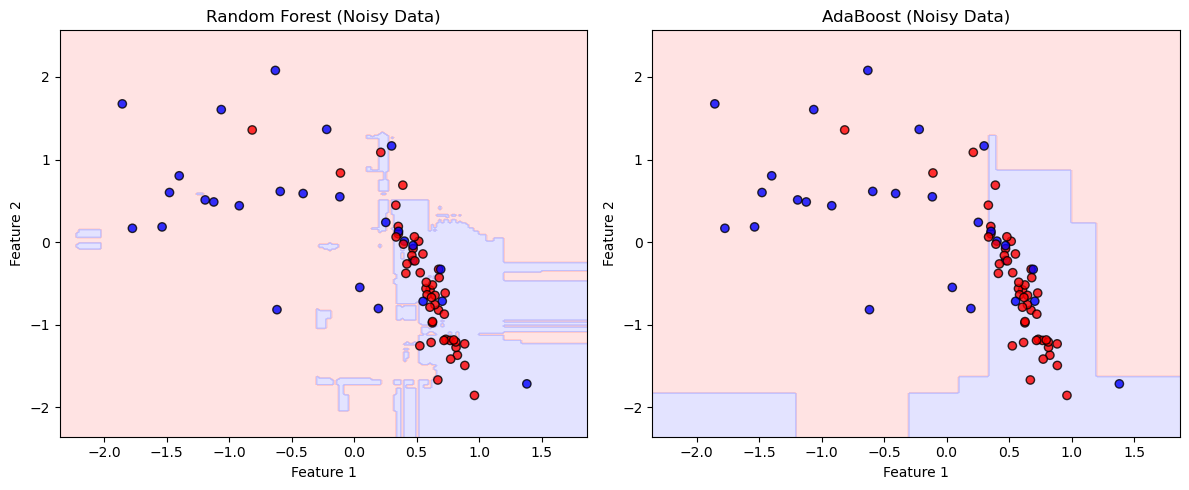

In [4]:
Xn, yn = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, class_sep=0.6, flip_y=0.2, random_state=7)
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.25, random_state=42)

rf_noisy = RandomForestClassifier(n_estimators=100, random_state=0).fit(Xn_train, yn_train)
ab_noisy = AdaBoostClassifier(n_estimators=50, random_state=0).fit(Xn_train, yn_train)

print("Random Forest Accuracy (noisy data):", accuracy_score(yn_test, rf_noisy.predict(Xn_test)))
print("AdaBoost Accuracy (noisy data):", accuracy_score(yn_test, ab_noisy.predict(Xn_test)))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(rf_noisy, Xn_test, yn_test, axs[0], "Random Forest (Noisy Data)")
plot_decision_boundary(ab_noisy, Xn_test, yn_test, axs[1], "AdaBoost (Noisy Data)")
plt.tight_layout()
plt.show()


## 4. Summary and Reflection

### Random Forest

✅ Strengths:
- Works well on clean data
- Reduces variance through averaging
- Less sensitive to noise

⚠️ Limitations:
- Computationally heavy
- Less interpretable

### AdaBoost

✅ Strengths:
- Focuses on difficult examples
- Can improve weak learners significantly

⚠️ Limitations:
- Sensitive to noise and outliers
- Requires careful tuning

---

📝 **Reflection Prompt**:

- Which model would you choose for a real-world dataset that may include noisy labels or outliers? Why?
- How might you tune or modify the boosting process to make it more robust to noise?
- Based on the visual decision boundaries, which model do you think offers better interpretability?

Take a moment to reflect and write down your thoughts.
